In [1]:
#Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks
from PIL import Image, ImageOps
import numpy as np
import os

In [25]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. TensorFlow is an open-source machine learning framework.It is widely used for deep learning tasks, such as neural networks, image processing, and natural language processing.
2. Keras is a high-level API for building neural networks, integrated into TensorFlow.
3. layers: Used to define various layers of a neural network, such as Dense, Conv2D, Dropout, etc.
4. models: Provides tools to build, train, and evaluate machine learning models.
5. callbacks: Allows you to define events that occur during training, such as early stopping, learning rate adjustment, etc.
6. Pillow (PIL) is a library for opening, manipulating, and saving image files.
7. Image: Provides functionality to load and manipulate images.
8. ImageOps: Contains additional image operations, such as resizing and flipping images.



In [2]:
#loading the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dataset Details:

Type of data: Handwritten digits (0–9).

Number of samples:
60,000 training images.
10,000 test images.

Image size: 28x28 grayscale images (each pixel value is between 0 and 255).

1. CIFAR-10 Dataset
The CIFAR-10 dataset is a collection of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
2. It is commonly used to train and evaluate image classification models.

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

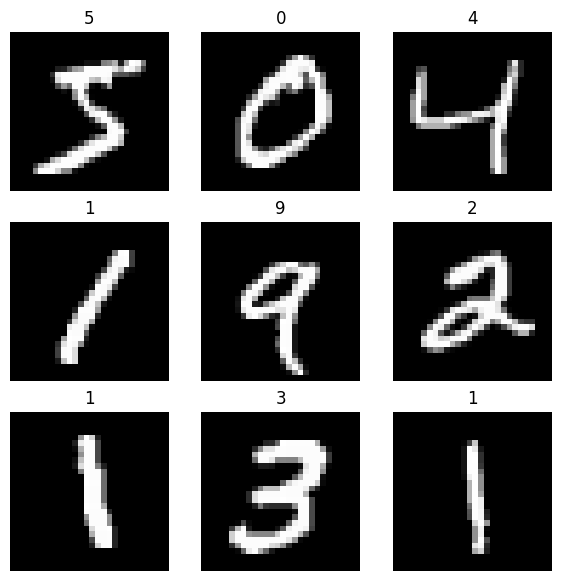

In [5]:
#Visually see the data
plt.figure(figsize=(7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(train_labels[i])
  plt.axis('off')

In [6]:
#Normalize the pixel; values as well (0-255)
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32')/255.0

In [7]:
#Shape
train_images[0].shape

(28, 28)

In [8]:
#Reshape to include channel dimesion
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

Why Add a Channel?

CNN layers like Conv2D expect the input to have 4 dimensions:
(batch_size, height, width, channels).
Adding the channel dimension ensures compatibility with the CNN input format.

In [9]:
#Checking shape
train_images[0].shape

(28, 28, 1)

In [10]:
#One Hot Encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [11]:
#DATA AUGMENTATION
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.10)])


Data Augmentation involves applying random transformations (e.g., zooming, rotation, flipping) to training data to:
1. Increase the diversity of the dataset.
2. Improve the model's generalization to unseen data.
3. It helps reduce overfitting, especially when the dataset is small.


In [12]:
def create_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 1)),  # Explicit input layer
        data_augmentation,                          # Data augmentation
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model



In [13]:
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Purpose of Each Section
1. Convolutional Layers: Automatically extract hierarchical features from the images.
2. Batch Normalization: Speeds up convergence and stabilizes the learning process.
3. Pooling Layers: Reduce spatial dimensions to prevent overfitting and lower computational costs.
4. Flattening: Prepares data for dense layers by converting 2D matrices to 1D vectors.
5. Dense Layers: Learn relationships between features and produce predictions.
6. Dropout: Reduces overfitting by randomly disabling neurons.
7. Softmax Output: Outputs class probabilities for classification.

In [14]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])


Why Compile the Model?
1. Prepares the model for training by defining how it should:
2. Update weights (optimizer).
3. Measure errors (loss).
4. Evaluate performance (metrics).
5. Ensures the training loop knows how to compute gradients and backpropagate.


In [15]:
#Implementing early stopping
early_stopping = callbacks.EarlyStopping(patience= 5, restore_best_weights=True)

In [16]:
#Reduce the learning rate
reduce_lr= callbacks.ReduceLROnPlateau(factor=0.20, patience=3)

Why Use These Callbacks?
1. EarlyStopping:

A. Prevents overfitting by stopping training when performance stops improving.

B. Saves computational time and resources by stopping training early.

C. Restores the best model weights, ensuring the best possible performance.

2. ReduceLROnPlateau:

A. Allows the model to fine-tune learning in the later stages of training.

B. Helps the model converge more effectively by lowering the learning rate when progress stalls.

C. Prevents the model from getting stuck at a suboptimal solution by giving it a "second chance" with smaller learning steps.

In [17]:
#Training
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.8475 - loss: 0.5025 - val_accuracy: 0.9796 - val_loss: 0.0679 - learning_rate: 0.0010
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.9639 - loss: 0.1191 - val_accuracy: 0.9768 - val_loss: 0.0803 - learning_rate: 0.0010
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 98ms/step - accuracy: 0.9712 - loss: 0.0990 - val_accuracy: 0.9783 - val_loss: 0.0780 - learning_rate: 0.0010
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 87s 105ms/step - accuracy: 0.9747 - loss: 0.0836 - val_accuracy: 0.9824 - val_loss: 0.0578 - learning_rate: 0.0010
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.9764 - loss: 0.0816 - val_accuracy: 0.9778 - val_loss: 0.0819 - learning_rate: 0.0010


In [18]:
#Evaluating the model
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9814 - loss: 0.0655


[0.061412688344717026, 0.9815000295639038]

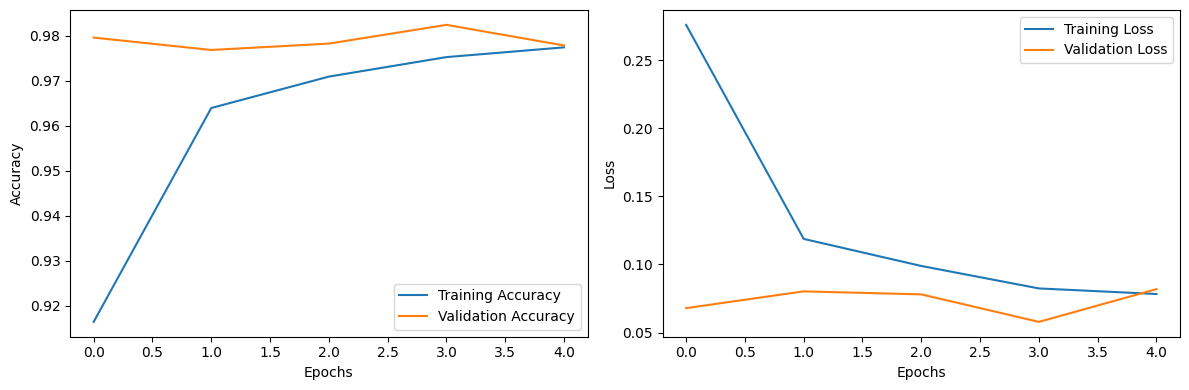

In [19]:
#Graphs
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

In [30]:
#Save
model.save('mnist_cnn_model.keras')
print(f"Model Saved as mnist_cnn_model.keras")

Model Saved as mnist_cnn_model.keras


In [31]:
#Prediction
def predict_image(image_path, model):
    img = Image.open(image_path).convert('L')   #  converts image to grayscale
    img = ImageOps.invert(img)                  # 0-> white. 255-black
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array.astype("float32") / 255
    img_array = img_array.reshape((-1, 28, 28, 1))

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    return predicted_class, confidence

1. np.argmax(prediction):
Finds the index of the class with the highest predicted probability.
This index corresponds to the predicted class.
2. np.max(prediction):
Retrieves the highest probability value.
Represents the confidence score for the predicted class.


In [35]:
def load_model_and_predict(image_path):
    loaded_model = tf.keras.models.load_model("mnist_cnn_model.keras")

    predicted_class, confidence = predict_image(image_path, loaded_model)
    print(f"Predicted digit : {predicted_class}")
    print(f"Confidence : {confidence}")

    img = Image.open(image_path).convert("L")
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted : {predicted_class} || (Confidence : {confidence})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted digit : 9
Confidence : 0.4864431619644165


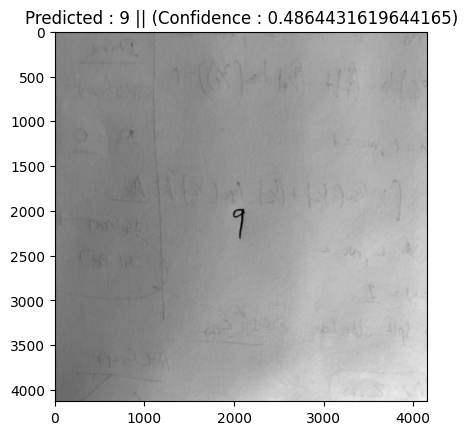

In [36]:
load_model_and_predict("/content/drive/MyDrive/9.jpeg")

In [48]:
#Trying to predict contact number
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your trained MNIST model
model = tf.keras.models.load_model("mnist_cnn_model.keras")

# Function to segment the image into individual digits
def segment_digits(image_path, num_digits=10):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = np.array(img)

    # Assuming digits are aligned horizontally; customize as needed
    img_height, img_width = img.shape
    digit_width = img_width // num_digits

    digits = []
    for i in range(num_digits):
        # Extract each digit by slicing
        digit = img[:, i * digit_width : (i + 1) * digit_width]
        digit = Image.fromarray(digit)
        digit = digit.resize((28, 28))  # Resize to match model input
        digits.append(digit)

    return digits

# Function to predict the full 10-digit number
def predict_contact_number(image_path, model):
    digits = segment_digits(image_path)
    predicted_number = []

    for digit in digits:
        # Preprocess each digit for the model
        digit_array = np.array(digit).astype('float32') / 255.0
        digit_array = digit_array.reshape((-1, 28, 28, 1))  # Reshape for the model

        # Predict the digit
        prediction = model.predict(digit_array)
        predicted_digit = np.argmax(prediction)
        predicted_number.append(predicted_digit)

    return ''.join(map(str, predicted_number))

# Example usage
image_path = "/content/drive/MyDrive/Number.jpeg"  # Replace with your image path
predicted_number = predict_contact_number(image_path, model)
print(f"Predicted Contact Number: {predicted_number}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Contact Number: 1888888899


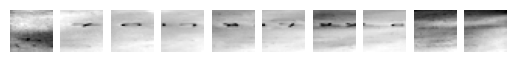

In [49]:
#Debugging the predictions
digits = segment_digits(image_path)  # Get segmented digits
for i, digit in enumerate(digits):
    plt.subplot(1, len(digits), i+1)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
plt.show()


In [44]:
#Enhance Preprocessing
def preprocess_digit(digit):
    digit = np.array(digit).astype('float32') / 255.0  # Normalize
    digit = digit.reshape((28, 28))  # Ensure it's 28x28
    digit = ImageOps.invert(digit)  # Ensure dark background, light digit
    return digit
